In [59]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\jeeva\Downloads\movie_data\movies.csv")

In [3]:
df.shape

(9742, 3)

In [10]:
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
rating=pd.read_csv(r"C:\Users\jeeva\Downloads\movie_data\ratings.csv")

In [5]:
rating.shape

(100836, 4)

In [8]:
rating["userId"].nunique()

610

In [24]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [25]:
rating["movieId"].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [27]:
df[df["movieId"] == 356]


,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [36]:
df[df["title"]=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [29]:
tag=pd.read_csv(r"C:\Users\jeeva\Downloads\movie_data\tags.csv")

In [38]:
tag[tag["movieId"]==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [39]:
df[df["title"]=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [54]:
sum=rating[rating["movieId"]==589]["rating"].values.sum()

In [55]:
n=len(rating[rating["movieId"]==589]["rating"])

In [56]:
sum/n

3.970982142857143

In [57]:
df[df["title"]== "Fight Club (1999)"]

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [168]:
rating[rating["movieId"]==2959]["rating"]

192      5.0
458      2.0
1134     0.5
1479     2.5
1635     3.5
        ... 
95893    5.0
96788    4.0
97835    5.0
99107    5.0
99699    5.0
Name: rating, Length: 218, dtype: float64

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

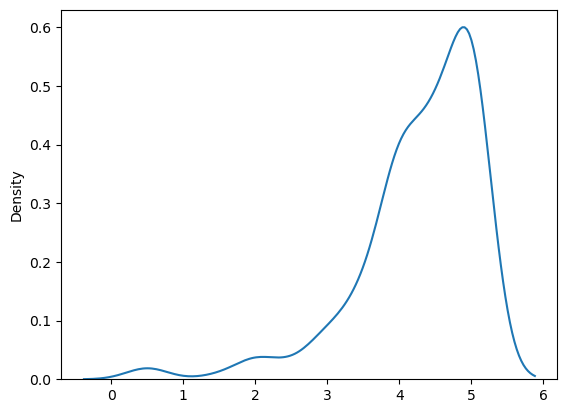

In [60]:
sns.kdeplot(rating[rating["movieId"]==2959]["rating"].values)

In [172]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [173]:
# ratings with avg rating

In [174]:
r_mean=rating.groupby("movieId")["rating"].mean().sort_values(ascending=False)

In [175]:
# ratings with ratings count

In [176]:
r_count=rating.groupby("movieId")["rating"].count().sort_values(ascending=False)

In [177]:
# joining the movies with the avg rating tabel

In [178]:
avg = pd.merge(df,r_mean, on='movieId', how='inner')

In [179]:
# joining the movies with the counts rating tabel

In [180]:
count= pd.merge(df,r_count, on='movieId', how='inner')

In [181]:
# filtering the counts rating table with top count >50

In [182]:
count=count[count["rating"]>50]


In [185]:
# renaming the columns

In [99]:
avg = avg.rename(columns={'rating': 'avg'})


In [100]:
avg

,movieId,title,genres,avg
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9721,193585,Flint (2017),Drama,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [101]:
count= count.rename(columns={'rating': 'count'})


In [102]:
count

,movieId,title,genres,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
5,6,Heat (1995),Action|Crime|Thriller,102
6,7,Sabrina (1995),Comedy|Romance,54
...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59


In [107]:
# getting the moviesid of the filtered rating count dataframe
l=count["movieId"].values

In [114]:
# getting the avg rating of the movies having more than 50 review count
avg= avg[avg['movieId'].isin(l)]


In [115]:
avg

,movieId,title,genres,avg
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,4.050847


In [123]:
avg["avg"].max()

4.429022082018927

In [124]:
avg[avg["avg"]==4.429022082018927]

,movieId,title,genres,avg
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022


In [130]:
count.sort_values(by='count').head(20)


,movieId,title,genres,count
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51
915,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51
1562,2100,Splash (1984),Comedy|Fantasy|Romance,51
3147,4239,Blow (2001),Crime|Drama,51
3490,4776,Training Day (2001),Crime|Drama|Thriller,51
1235,1645,The Devil's Advocate (1997),Drama|Mystery|Thriller,51
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51
192,225,Disclosure (1994),Drama|Thriller,52
2380,3160,Magnolia (1999),Drama,52
2650,3552,Caddyshack (1980),Comedy,52


In [138]:
# getting the genres which having the sci-fi and storing them in a list ll for filtering
gen=count["genres"].values

In [141]:
ll=[]
for i in gen:
    if "Sci-Fi" in i:
        ll.append(i)

In [147]:
count[count["genres"].isin(ll)].sort_values(by='count')


,movieId,title,genres,count
6192,45499,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54
...,...,...,...,...
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251
